<a href="https://colab.research.google.com/github/Pedro-Prestes/learning/blob/master/Grau_Satisfa%C3%A7%C3%A3o_Sobrecarga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **`Análise do CONSTRUTO _ "Grau de Satisfação e Sobrecarga do Professor”.`**

In [1]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
%matplotlib inline
!pip3 install bokeh

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
gss = pd.read_csv('/content/drive/My Drive/Pesquisa_Doutorado/Análise_doutorado/GrauSatisfaЗ╞o_sobrecarga/Pesquisa - NTE (Profs. Formadores)GS.csv')

In [0]:
gss["Professores"] = gss["Professores"].apply(lambda x: str(x))

In [4]:
gss.head()

,Professores,"Comparando com a modalidade de educação presencial, a modalidade de educação à distância favorece minha eficácia ao processo de ensino","Estou satisfeito por ter acesso a conteúdos curados (planos de aula com orientações pedagógicas, atividades para alunos, ODAs, etc...)",Estou satisfeito com a interação que o ambiente virtual de aprendizagem promove entre professores e alunos,"As atividades semi-presencial através da plataforma virtual de aprendizagem permite o acompanhamento da turma, maior dinamismo nas aulas, promove a interação entre os estudantes e fornece feedback",Estou satisfeito com as atividades interativas desenvolvidas ao longo da disciplina através dos ODAs e da plataforma virtual de ensino-aprendizagem,Estou satisfeito porque fui estimulado a participar das discussões dos conteúdos através do processo de curadoria promovendo a retroalimentação de novos objetos digitais de aprendizagem da plataforma escola digital,Estou satisfeito porque fui encorajado a mediar os alunos instigando-os com trabalhos colaborativos,"Estou satisfeito com o AVA, plataformas de ODAs e com o mecanismo de avaliação - LV em relação às suas funcionalidades (bugs, instabilidade da plataforma e do mecanismo de avaliação)","Estou satisfeito por ter recebido treinamento sobre o uso da plataforma Escola Digital, AVA-Moodle, Plataforma Endless, mecanismo de avaliação LV e da metodologia Sala de aula invertida",Estou satisfeito em relação à velocidade de internet,Estou satisfeito com a infra-estrutura da escola,"Estou satisfeito porque posso programar, acompanhar e avaliar atividades utilizando ambientes virtuais de aprendizagens diminuindo a minha sobrecarga"
0,NTE,4,4,4,4,3,0,4,4,0,1,2,3
1,NTE,3,3,3,3,3,3,3,3,3,2,1,2
2,NTE,4,4,4,3,3,3,4,2,3,4,3,3
3,NTE,4,0,2,4,2,0,0,2,4,2,2,4
4,NTE,4,3,4,4,4,2,4,2,2,2,2,4


In [0]:
gss.rename({'Comparando com a modalidade de educação presencial, a modalidade de educação à distância favorece minha eficácia ao processo de ensino':'Q001','Estou satisfeito por ter acesso a conteúdos curados (planos de aula com orientações pedagógicas, atividades para alunos, ODAs, etc...)':'Q002','Estou satisfeito com a interação que o ambiente virtual de aprendizagem promove entre professores e alunos':'Q003','As atividades semi-presencial através da plataforma virtual de aprendizagem permite o acompanhamento da turma, maior dinamismo nas aulas, promove a interação entre os estudantes e fornece feedback':'Q004','Estou satisfeito com as atividades interativas desenvolvidas ao longo da disciplina através dos ODAs e da plataforma virtual de ensino-aprendizagem':'Q005','Estou satisfeito porque fui estimulado a participar das discussões dos conteúdos através do processo de curadoria promovendo a retroalimentação de novos objetos digitais de aprendizagem da plataforma escola digital':'Q006','Estou satisfeito porque fui encorajado a mediar os alunos instigando-os com trabalhos colaborativos':'Q007','Estou satisfeito com o AVA, plataformas de ODAs e com o mecanismo de avaliação - LV em relação às suas funcionalidades (bugs, instabilidade da plataforma e do mecanismo de avaliação)':'Q008','Estou satisfeito por ter recebido treinamento sobre o uso da plataforma Escola Digital, AVA-Moodle, Plataforma Endless, mecanismo de avaliação LV e da metodologia Sala de aula invertida':'Q009','Estou satisfeito em relação à velocidade de internet':'Q010','Estou satisfeito com a infra-estrutura da escola':'Q011','Estou satisfeito porque posso programar, acompanhar e avaliar atividades utilizando ambientes virtuais de aprendizagens diminuindo a minha sobrecarga':'Q012'}, axis='columns', inplace=True)

In [6]:
gss.head()

,Professores,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012
0,NTE,4,4,4,4,3,0,4,4,0,1,2,3
1,NTE,3,3,3,3,3,3,3,3,3,2,1,2
2,NTE,4,4,4,3,3,3,4,2,3,4,3,3
3,NTE,4,0,2,4,2,0,0,2,4,2,2,4
4,NTE,4,3,4,4,4,2,4,2,2,2,2,4


In [0]:
gss = gss.set_index('Professores')

In [8]:
gss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, NTE to NTE
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q001    5 non-null      int64
 1   Q002    5 non-null      int64
 2   Q003    5 non-null      int64
 3   Q004    5 non-null      int64
 4   Q005    5 non-null      int64
 5   Q006    5 non-null      int64
 6   Q007    5 non-null      int64
 7   Q008    5 non-null      int64
 8   Q009    5 non-null      int64
 9   Q010    5 non-null      int64
 10  Q011    5 non-null      int64
 11  Q012    5 non-null      int64
dtypes: int64(12)
memory usage: 520.0+ bytes


In [9]:
gss.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012
Professores,,,,,,,,,,,,
NTE,4,4,4,4,3,0,4,4,0,1,2,3
NTE,3,3,3,3,3,3,3,3,3,2,1,2
NTE,4,4,4,3,3,3,4,2,3,4,3,3
NTE,4,0,2,4,2,0,0,2,4,2,2,4
NTE,4,3,4,4,4,2,4,2,2,2,2,4


In [10]:
gss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, NTE to NTE
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q001    5 non-null      int64
 1   Q002    5 non-null      int64
 2   Q003    5 non-null      int64
 3   Q004    5 non-null      int64
 4   Q005    5 non-null      int64
 5   Q006    5 non-null      int64
 6   Q007    5 non-null      int64
 7   Q008    5 non-null      int64
 8   Q009    5 non-null      int64
 9   Q010    5 non-null      int64
 10  Q011    5 non-null      int64
 11  Q012    5 non-null      int64
dtypes: int64(12)
memory usage: 520.0+ bytes


In [11]:
gss.isnull()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012
Professores,,,,,,,,,,,,
NTE,False,False,False,False,False,False,False,False,False,False,False,False
NTE,False,False,False,False,False,False,False,False,False,False,False,False
NTE,False,False,False,False,False,False,False,False,False,False,False,False
NTE,False,False,False,False,False,False,False,False,False,False,False,False
NTE,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# Análise da sobrecarga e retenção
# Pegando a questão 'Q012' como principal assertiva observa-se, conforme análise, que mesmo concedendo treinamento para os professores
# formadores do NTE - Núcleo Tecnológico Educacional, a correlação com as demais assertivas de certa forma, registram dicotomias onde
# críticas e elogios detectadas em outras assertivas demonstram felicidades, elogios e afirmações de que o treinamento quando ofertado
# corroboram na prática exercida colhendo bons resultados.  
# Em relação as assertivas 'Q012' e 'Q004' demonstram uma forte para moderada correlação devido aos acompanhamentos, interações e 
# feedback's contudo analisando outras assertivas de satisfação demonstram fraca ou nenhuma correlação com a 'Q012' que trata da sobrecarga.
# Em relação a 'Q008' e 'Q006' demonstram moderada correlação no sentido inverso.
# 'Q002', 'Q003', 'Q005' e 'Q007' com grau de satifação fortemente correlacionadas, contudo apenas a 'Q002' de forma moderada inversa 
# se correlaciona com a 'Q012' que é bem objetiva sobre a questão da sobrecarga.       
gss.corr(method='pearson')

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012
Q001,1.000000,-0.068041,0.250000,0.612372,0.000000,-0.516047,0.000000,-0.250000,-0.221163,0.102062,0.790569,0.801784
Q002,-0.068041,1.000000,0.918559,-0.388889,0.645497,0.461479,0.966252,0.442269,-0.662122,0.166667,0.215166,-0.509175
Q003,0.250000,0.918559,1.000000,-0.102062,0.790569,0.331744,0.968246,0.250000,-0.700349,0.153093,0.395285,-0.133631
Q004,0.612372,-0.388889,-0.102062,1.000000,0.000000,-0.842701,-0.263523,0.102062,-0.361158,-0.666667,0.000000,0.763763
Q005,0.000000,0.645497,0.790569,0.000000,1.000000,0.466252,0.816497,0.000000,-0.466252,0.000000,0.000000,0.000000
Q006,-0.516047,0.461479,0.331744,-0.842701,0.466252,1.000000,0.475867,-0.331744,0.304348,0.662122,0.000000,-0.512272
Q007,0.000000,0.966252,0.968246,-0.263523,0.816497,0.475867,1.000000,0.322749,-0.666214,0.131762,0.204124,-0.345033
Q008,-0.250000,0.442269,0.250000,0.102062,0.000000,-0.331744,0.322749,1.000000,-0.774070,-0.663403,-0.395285,-0.534522
Q009,-0.221163,-0.662122,-0.700349,-0.361158,-0.466252,0.304348,-0.666214,-0.774070,1.000000,0.541736,0.000000,0.118217
Q010,0.102062,0.166667,0.153093,-0.666667,0.000000,0.662122,0.131762,-0.663403,0.541736,1.000000,0.645497,-0.054554


In [0]:
# Calcule a correlação  
correlacoes = gss.corr(method='pearson')

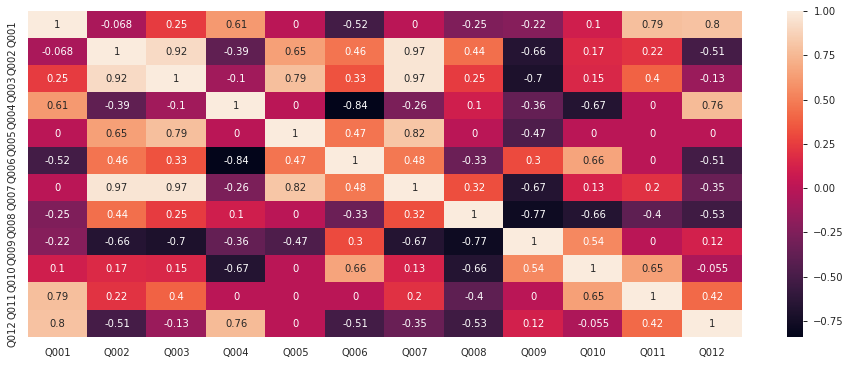

In [369]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

In [370]:
gss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, NTE to NTE
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q001    5 non-null      int64
 1   Q002    5 non-null      int64
 2   Q003    5 non-null      int64
 3   Q004    5 non-null      int64
 4   Q005    5 non-null      int64
 5   Q006    5 non-null      int64
 6   Q007    5 non-null      int64
 7   Q008    5 non-null      int64
 8   Q009    5 non-null      int64
 9   Q010    5 non-null      int64
 10  Q011    5 non-null      int64
 11  Q012    5 non-null      int64
dtypes: int64(12)
memory usage: 520.0+ bytes


In [0]:
# Calcule a correlação  
correlacoes = gss.corr(method='spearman')

In [372]:
# Apenas uma amostragem por acionamento mecânico, contudo vale apena automatizar como demonstrado acima.
gss['Q012'].corr(gss['Q004'])

0.7637626158259733

In [373]:
gss['Q006'].corr(gss['Q004'])

-0.8427009716003843

In [374]:
gss['Q006'].corr(gss['Q009'])

0.3043478260869564

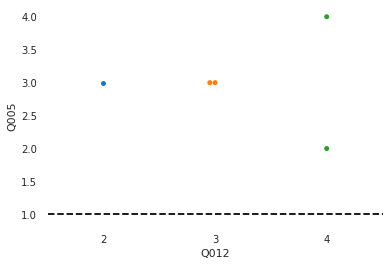

In [375]:
sns.swarmplot(data=gss, x='Q012', y='Q005')
plt.axhline(1.0, color='black', linestyle='--')

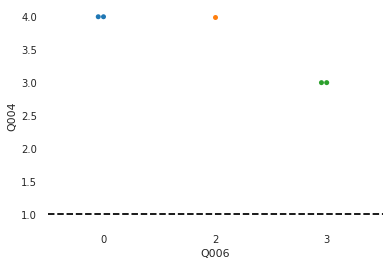

In [376]:
sns.swarmplot(data=gss, x='Q006', y='Q004')
plt.axhline(1.0, color='black', linestyle='--')

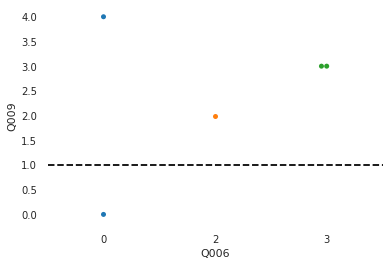

In [377]:
sns.swarmplot(data=gss, x='Q006', y='Q009')
plt.axhline(1.0, color='black', linestyle='--')

In [0]:
#X = gss.drop(['Q012'], axis=1)
#y = gss['Q006']

In [0]:
X = gss.drop(['Q012'], axis=1)
y = gss['Q012']

In [380]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
f_classif = SelectKBest(score_func=f_classif, k=4)
fit = f_classif.fit(X,y)
features = fit.transform(X)

# Visualizando as features:
print(features)

[[4 4 4 2]
 [3 3 3 1]
 [4 4 3 3]
 [4 0 4 2]
 [4 3 4 2]]


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [0] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [381]:
cols = fit.get_support(indices=True)
gss.iloc[:,cols]

,Q001,Q002,Q004,Q011
Professores,,,,
NTE,4,4,4,2
NTE,3,3,3,1
NTE,4,4,3,3
NTE,4,0,4,2
NTE,4,3,4,2


In [0]:
#features categóricas ou variável alvo categórica
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
# feature extraction
test = SelectKBest(chi2, k=4)

In [0]:
fit = test.fit(X, y)

In [385]:
fit.get_support(indices=True)

array([1, 5, 6, 8])

In [0]:
features = fit.transform(X)

In [387]:
# Visualizando as features:
print(features)

[[4 0 4 0]
 [3 3 3 3]
 [4 3 4 3]
 [0 0 0 4]
 [3 2 4 2]]


In [388]:
cols = fit.get_support(indices=True)
gss.iloc[:, cols]

,Q002,Q006,Q007,Q009
Professores,,,,
NTE,4,0,4,0
NTE,3,3,3,3
NTE,4,3,4,3
NTE,0,0,0,4
NTE,3,2,4,2


In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
from sklearn.feature_selection import RFE
rfe = RFE(model, 4)
fit = rfe.fit(X, y)

In [390]:
# Mostrando o número de features:
print ("Número de features: {}".format(fit.n_features_))  

Número de features: 4


In [391]:
# Visualizando os índices:
cols = fit.get_support(indices=True)
gss.iloc[:,cols]

,Q002,Q006,Q008,Q011
Professores,,,,
NTE,4,0,4,2
NTE,3,3,3,1
NTE,4,3,2,3
NTE,0,0,2,2
NTE,3,2,2,2


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [393]:
# feature extraction
model = RandomForestClassifier(n_estimators=10)
model.fit(X, y)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [394]:
# Score de cada um dos atributos:
print(model.feature_importances_)

[0.1        0.04642857 0.         0.14166667 0.1        0.11785714
 0.1        0.08928571 0.         0.25833333 0.04642857]


In [395]:
# Nome das colunas:
gss

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012
Professores,,,,,,,,,,,,
NTE,4,4,4,4,3,0,4,4,0,1,2,3
NTE,3,3,3,3,3,3,3,3,3,2,1,2
NTE,4,4,4,3,3,3,4,2,3,4,3,3
NTE,4,0,2,4,2,0,0,2,4,2,2,4
NTE,4,3,4,4,4,2,4,2,2,2,2,4


In [396]:
# Criando um Dataframe com as colunas e seus scores:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Q010,0.258333
Q004,0.141667
Q006,0.117857
Q001,0.100000
Q005,0.100000
Q007,0.100000
Q008,0.089286
Q002,0.046429
Q011,0.046429
Q003,0.000000


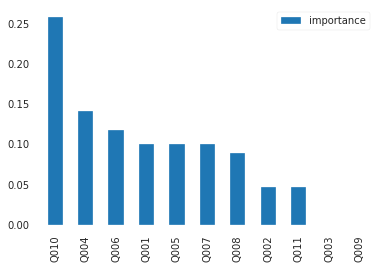

In [397]:
# Visualizando as importâncias de forma gráfica:
feature_importances.plot(kind='bar')

In [398]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('feature_selection', RFE(LogisticRegression(max_iter=2000),4)),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('feature_selection',
                 RFE(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=2000,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=4, step=1, verbose=0)),
                ('classi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        cl

In [399]:
clf.steps

[('feature_selection',
  RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=2000,
                                   multi_class='auto', n_jobs=None, penalty='l2',
                                   random_state=None, solver='lbfgs', tol=0.0001,
                                   verbose=0, warm_start=False),
      n_features_to_select=4, step=1, verbose=0)),
 ('classification',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_j

In [400]:
gss.describe()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,3.800000,2.800000,3.400000,3.600000,3.000000,1.600000,3.000000,2.600000,2.400000,2.200000,2.000000,3.20000
std,0.447214,1.643168,0.894427,0.547723,0.707107,1.516575,1.732051,0.894427,1.516575,1.095445,0.707107,0.83666
min,3.000000,0.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.00000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,0.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.00000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,2.000000,3.00000
75%,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,4.00000
max,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000


In [0]:
# Árvore de decisão será o próximo passo de nossa análise, 
# contudo vale apena deixar claro que esta técnica está propência
# a embaralhar os resultados dos testes em relação ao resultado de treinos permitindo o overfitting, e também é um pouco instável.

# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(gss.drop('Q012',axis=1),gss['Q012'],test_size=0.3)

In [402]:
# Verificando as formas dos dados:
X_train.shape,X_test.shape

((3, 11), (2, 11))

In [0]:
# Instânciando o objeto classificador:
clf = DecisionTreeClassifier()

In [0]:
# Treinando o modelo de arvore de decisão:
clf = clf.fit(X_train,y_train)

In [405]:
# Verificando as features mais importantes para o modelo treinado:
clf.feature_importances_

# O código acima nos retorna um array com o valor de cada variável:

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [406]:
for feature, importances_ in zip(gss.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importances_))

# Confirmando a melhor correlação (Q012) para (Q006).
# segundo teste - confirmando a melhor correlaçãão (Q001) para (Q003)
# Saída:

Q001:0.0
Q002:0.0
Q003:0.0
Q004:0.0
Q005:0.0
Q006:1.0
Q007:0.0
Q008:0.0
Q009:0.0
Q010:0.0
Q011:0.0


In [407]:
resultado = clf.predict(X_test)
resultado
# O código acima nos da a seguinte saída:

array([4, 2])

In [408]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

# Resultado do classification_report:

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       2.0
           4       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [409]:
# Renderizando a árvore de forma gráfica:
!pip3 install ipywidgets
!pip3 install graphviz
!pip3 install pydot
import pydot

In [0]:
import pydot
import graphviz

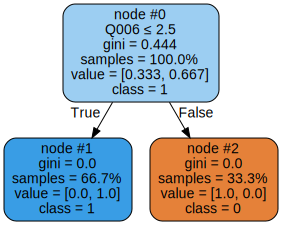

In [411]:
dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names=gss.drop('Q012',axis=1).columns,
         class_names=['0','1', '2','3','4'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

In [412]:
# Renderizando a árvore de forma interativa:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

# feature matrix
X,y = gss.drop('Q012',axis=1),gss['Q012']

# feature labels
features_label = gss.drop('Q004',axis=1).columns

# class label
class_label = ['1', '2','3','4']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


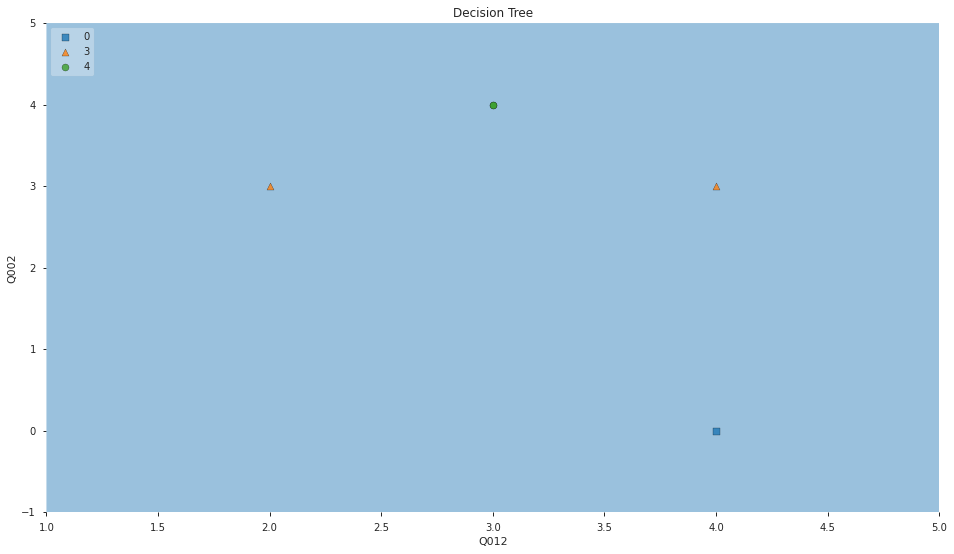

In [413]:
# Visualizando as fronteiras criadas pela arvore:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def visualize_fronteiras(msamples_split,max_depth):
    X = gss[['Q012','Q002']].values
    y = gss.Q002.values
    clf = DecisionTreeClassifier(min_samples_split=msamples_split,max_depth=max_depth)
    tree = clf.fit(X, y)

    plt.figure(figsize=(16,9))
    plot_decision_regions(X, y, clf=tree, legend=2)

    plt.xlabel('Q012')
    plt.ylabel('Q002')
    plt.title('Decision Tree')
    plt.show()

# Chamando a função criada anteriormente:

visualize_fronteiras(10,max_depth=8)

In [414]:
# Navegando na estrutura da arvore de decisão:
estimator = DecisionTreeClassifier(max_depth=3,min_samples_split=2,min_samples_leaf=2)
estimator.fit(X, y)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

print("Número de nós: {}".format(n_nodes))

Número de nós: 3


In [415]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 gss.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


A arvore binária tem 3 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo Q002 <= 3.5 
 se não, vai para o nó 2.
	nó=1 (nó folha).
	nó=2 (nó folha).


In [0]:
def extrai_regras(sample_id):
    node_indicator = estimator.decision_path(X)

    leave_id = estimator.apply(X)

    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('\nFeatures usadas para predizer a amostra %s' % (sample_id))

    for f,v in zip(gss.columns,X.iloc[sample_id].values):
        print('%s = %s'%(f,v))

    print('\n')      
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)"
              % (node_id,
                 gss.columns[feature[node_id]],
                 X.iloc[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
        
    pred =estimator.predict(X.iloc[sample_id].values.reshape(1, -1))
    print(pred) 
    print("\tClasse => %s" %pred)

In [417]:
extrai_regras(2)


Features usadas para predizer a amostra 2
Q001 = 4
Q002 = 4
Q003 = 4
Q004 = 3
Q005 = 3
Q006 = 3
Q007 = 4
Q008 = 2
Q009 = 3
Q010 = 4
Q011 = 3


id do nó de decisão 0 : (atributo Q002 com valor = 4 > 3.5)
[3]
	Classe => [3]


In [418]:
extrai_regras(3)


Features usadas para predizer a amostra 3
Q001 = 4
Q002 = 0
Q003 = 2
Q004 = 4
Q005 = 2
Q006 = 0
Q007 = 0
Q008 = 2
Q009 = 4
Q010 = 2
Q011 = 2


id do nó de decisão 0 : (atributo Q002 com valor = 0 <= 3.5)
[4]
	Classe => [4]


In [419]:
# instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=d3ba2ea95f20d6e63f306f662233465818cccbf3102fd916f63c398497764bad
  Stored in directory: /tmp/pip-ephem-wheel-cache-_njgd2v4/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [0]:
# import o ProfileReport
from pandas_profiling import ProfileReport

In [0]:
# executando o profile
profile = ProfileReport(gss, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [424]:
profile

In [425]:
# salvando o relatório no disco
profile.to_file(output_file="Relatorio01.html")

In [0]:
#Interpretando o valor de ρ

    #0.9 a 1 positivo ou negativo indica uma correlação muito forte.
    #0.7 a 0.9 positivo ou negativo indica uma correlação forte.
    #0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
    #0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
    #0 a 0.3 positivo ou negativo indica uma correlação desprezível.